## Import libaries

In [3]:
import cv2 
import numpy as np 
import pandas as pd 
import tensorflow as tf
from tensorflow.keras.models import load_model
from tensorflow.keras import models,layers
import pathlib
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.callbacks import ReduceLROnPlateau
import os
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from tensorflow.keras.applications import MobileNet
from tensorflow.keras.applications.mobilenet import preprocess_input
from tensorflow.keras.applications.resnet50 import ResNet50
from keras.layers import Dense,Input,Dropout,GlobalAveragePooling2D,Flatten,Conv2D,BatchNormalization,Activation,MaxPooling2D
from keras.models import Model,Sequential
from keras.optimizers import Adam,SGD,RMSprop
from sklearn.metrics import accuracy_score 

## FER dataset full expressions

In [108]:
data_dir='G:/FCAI/GP/Datasets/FER 2013'

In [109]:
dataset_train_dir=pathlib.Path(data_dir+'/train')
dataset_test_dir=pathlib.Path(data_dir+'/test')


In [110]:
expression_images_train_dict={
    
    'anger':list(dataset_path.glob('anger/*')),
    'disgust':list(dataset_path.glob('disgust/*')),
    'fear':list(dataset_path.glob('fear/*')),
    'happy':list(dataset_path.glob('happy/*')),
    'neutral':list(dataset_path.glob('neutral/*')),
    'sad':list(dataset_path.glob('sad/*')),
    'surprise':list(dataset_path.glob('surprise/*')),
}

expression_images_test_dict={
    
    'anger':list(dataset_path.glob('anger/*')),
    'disgust':list(dataset_path.glob('disgust/*')),
    'fear':list(dataset_path.glob('fear/*')),
    'happy':list(dataset_path.glob('happy/*')),
    'neutral':list(dataset_path.glob('neutral/*')),
    'sad':list(dataset_path.glob('sad/*')),
    'surprise':list(dataset_path.glob('surprise/*')),
}


In [111]:
X_train,X_test,y_train,y_test=[],[],[],[]
for ex_name,images in expression_images_train_dict.items():
    for image in images:
        img=cv2.imread(str(image))
        resized_img=cv2.resize(img,(48,48))
        X_train.append(resized_img)
        y_train.append(ex_name)

for ex_name,images in expression_images_test_dict.items():
    for image in images:
        img=cv2.imread(str(image))
        resized_img=cv2.resize(img,(48,48))
        X_test.append(resized_img)
        y_test.append(ex_name)

In [114]:
X_train=np.array(X_train)
X_test=np.array(X_test)
y_train=np.array(y_train)
y_test=np.array(y_test)

In [115]:
label_encoder = LabelEncoder()
y_train = label_encoder.fit_transform(y_train)
y_test = label_encoder.fit_transform(y_test)

In [116]:
X_train=X_train.astype("float16")/255.0
X_test=X_test.astype("float16")/255.0

In [117]:
datagen = ImageDataGenerator(
    rotation_range=15,
    width_shift_range=0.1,
    height_shift_range=0.1,
    zoom_range=0.2,
    horizontal_flip=True
)

In [134]:
train_generator = datagen.flow(X_train, y_train, batch_size=32, shuffle=True)
test_generator = datagen.flow(X_test, y_test, batch_size=32, shuffle=False)

### cnn

In [124]:
cnn = tf.keras.models.Sequential()

cnn.add(tf.keras.layers.Conv2D(filters=64, kernel_size=3, activation='relu',padding = 'same', input_shape=[48, 48, 3]))
cnn.add(tf.keras.layers.BatchNormalization())
cnn.add(Dropout(0.25))
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2))

cnn.add(tf.keras.layers.Conv2D(filters=125, kernel_size=5, activation='relu',padding = 'same'))
cnn.add(tf.keras.layers.BatchNormalization())
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2))
cnn.add(tf.keras.layers.Dropout(0.25))

cnn.add(tf.keras.layers.Conv2D(filters=512, kernel_size=3, activation='relu',padding = 'same'))
cnn.add(tf.keras.layers.BatchNormalization())
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2))
cnn.add(tf.keras.layers.Dropout(0.25))

cnn.add(tf.keras.layers.Conv2D(filters=512, kernel_size=3, activation='relu',padding = 'same'))
cnn.add(tf.keras.layers.BatchNormalization())
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2))
cnn.add(tf.keras.layers.Dropout(0.25))

cnn.add(tf.keras.layers.Flatten())

cnn.add(tf.keras.layers.Dense(units=256, activation='relu'))
cnn.add(tf.keras.layers.BatchNormalization())
cnn.add(tf.keras.layers.Dropout(0.25))

cnn.add(tf.keras.layers.Dense(units=7, activation='softmax'))

In [125]:
cnn.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [126]:
reduce_lr = ReduceLROnPlateau(monitor='val_accuracy', factor=0.5, patience=5, min_lr=1e-7)

In [127]:
early_stopping = EarlyStopping(monitor='val_accuracy', patience=10, restore_best_weights=True)

In [128]:
cnn.fit(X_train,y_train, epochs=50, validation_data=(X_test,y_test),callbacks=[early_stopping,reduce_lr] )

Epoch 1/50
818/818 [==============================] - 723s 884ms/step - loss: 1.5185 - accuracy: 0.4065 - val_loss: 1.2754 - val_accuracy: 0.4829
Epoch 2/50
818/818 [==============================] - 753s 921ms/step - loss: 1.1108 - accuracy: 0.5529 - val_loss: 1.1781 - val_accuracy: 0.5148
Epoch 3/50
818/818 [==============================] - 589s 720ms/step - loss: 0.9981 - accuracy: 0.6027 - val_loss: 0.9481 - val_accuracy: 0.6385
Epoch 4/50
818/818 [==============================] - 587s 718ms/step - loss: 0.9296 - accuracy: 0.6371 - val_loss: 0.9301 - val_accuracy: 0.6626
Epoch 5/50
818/818 [==============================] - 589s 720ms/step - loss: 0.8798 - accuracy: 0.6551 - val_loss: 0.9065 - val_accuracy: 0.6406
Epoch 6/50
344/818 [===========>..................] - ETA: 4:57 - loss: 0.8206 - accuracy: 0.6815

KeyboardInterrupt: 

### MobileNet

In [135]:
base_model = MobileNet(weights='imagenet', include_top=False, input_shape=(128, 128, 3))
for layer in base_model.layers:
    layer.trainable = False

# Build your custom model on top of MobileNet
x = base_model.output
x = tf.keras.layers.GlobalAveragePooling2D()(x)
x = tf.keras.layers.Dense(1024, activation='relu')(x)
predictions = tf.keras.layers.Dense(7, activation='softmax')(x)

model = tf.keras.models.Model(inputs=base_model.input, outputs=predictions)

In [136]:
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [137]:
early_stopping = EarlyStopping(monitor='val_accuracy', patience=10, restore_best_weights=True)

In [138]:
model.fit(train_generator, epochs=50, validation_data=test_generator,callbacks=[early_stopping])

Epoch 1/50
818/818 [==============================] - 75s 92ms/step - loss: 1.7432 - accuracy: 0.3053 - val_loss: 1.6775 - val_accuracy: 0.3368
Epoch 2/50
818/818 [==============================] - 66s 80ms/step - loss: 1.6795 - accuracy: 0.3339 - val_loss: 1.6566 - val_accuracy: 0.3454
Epoch 3/50
818/818 [==============================] - 63s 77ms/step - loss: 1.6591 - accuracy: 0.3423 - val_loss: 1.6354 - val_accuracy: 0.3523
Epoch 4/50
 67/818 [=>............................] - ETA: 35s - loss: 1.6525 - accuracy: 0.3382

KeyboardInterrupt: 

## CNN Model FER 3 Expressions 


In [11]:

model=tf.keras.models.Sequential()

model.add(tf.keras.layers.Conv2D(filters=64, kernel_size=3, activation='relu', input_shape=[48, 48, 3]))
model.add(tf.keras.layers.MaxPool2D(pool_size=2))

model.add(tf.keras.layers.Conv2D(filters=32, kernel_size=3, activation='relu'))
model.add(tf.keras.layers.MaxPool2D(pool_size=2))

model.add(tf.keras.layers.Dropout( 0.2 ))

model.add(tf.keras.layers.Conv2D(filters=128, kernel_size=3, activation='relu'))
model.add(tf.keras.layers.MaxPool2D(pool_size=2))

model.add(tf.keras.layers.Dropout( 0.2 ))

model.add(tf.keras.layers.Conv2D(filters=128, kernel_size=3, activation='relu'))

model.add(tf.keras.layers.Dropout( 0.2 ))

model.add(tf.keras.layers.Flatten())

model.add(tf.keras.layers.Dense(units=512, activation='relu'))

model.add(tf.keras.layers.Dropout( 0.5 ))

model.add(tf.keras.layers.Dense(units=512, activation='relu'))

model.add(tf.keras.layers.Dropout( 0.5 ))


model.add(tf.keras.layers.Dense(units=3, activation='softmax'))

model.compile(optimizer = 'adam', loss = 'sparse_categorical_crossentropy', metrics = ['accuracy'])


early_stopping = EarlyStopping(monitor='val_accuracy', patience=10, restore_best_weights=True)


In [12]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 46, 46, 64)        1792      
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 23, 23, 64)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 21, 21, 32)        18464     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 10, 10, 32)        0         
_________________________________________________________________
dropout (Dropout)            (None, 10, 10, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 8, 8, 128)         36992     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 4, 4, 128)         0

In [26]:
model.fit(X_train, y_train, epochs=100, validation_data=(X_test, y_test),callbacks=[early_stopping] )


Epoch 1/100
  3/799 [..............................] - ETA: 3:48 - loss: 0.9931 - accuracy: 0.5521

KeyboardInterrupt: 

### Results: 
    training accuracy: 77
    val accuracy:75
### -------------------------

### 4th Trial


In [110]:
model = tf.keras.models.Sequential()

model.add(tf.keras.layers.Conv2D(filters=128, kernel_size=3, activation='relu', input_shape=[48, 48, 3]))
model.add(tf.keras.layers.BatchNormalization())
model.add(tf.keras.layers.MaxPool2D(pool_size=2))

model.add(tf.keras.layers.Conv2D(filters=64, kernel_size=3, activation='relu'))
model.add(tf.keras.layers.BatchNormalization())
model.add(tf.keras.layers.MaxPool2D(pool_size=2))

model.add(tf.keras.layers.Dropout(0.2))

model.add(tf.keras.layers.Conv2D(filters=256, kernel_size=3, activation='relu'))
model.add(tf.keras.layers.BatchNormalization())
model.add(tf.keras.layers.MaxPool2D(pool_size=2))

model.add(tf.keras.layers.Dropout(0.2))

model.add(tf.keras.layers.Conv2D(filters=256, kernel_size=3, activation='relu'))
model.add(tf.keras.layers.BatchNormalization())
model.add(tf.keras.layers.Dropout(0.2))

model.add(tf.keras.layers.Flatten())

model.add(tf.keras.layers.Dense(units=512, activation='relu'))
model.add(tf.keras.layers.BatchNormalization())
model.add(tf.keras.layers.Dropout(0.5))

model.add(tf.keras.layers.Dense(units=256, activation='relu'))
model.add(tf.keras.layers.BatchNormalization())
model.add(tf.keras.layers.Dropout(0.5))

model.add(tf.keras.layers.Dense(units=3, activation='softmax'))

In [111]:
model.summary()

Model: "sequential_9"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_34 (Conv2D)           (None, 46, 46, 128)       3584      
_________________________________________________________________
batch_normalization_27 (Batc (None, 46, 46, 128)       512       
_________________________________________________________________
max_pooling2d_26 (MaxPooling (None, 23, 23, 128)       0         
_________________________________________________________________
conv2d_35 (Conv2D)           (None, 21, 21, 64)        73792     
_________________________________________________________________
batch_normalization_28 (Batc (None, 21, 21, 64)        256       
_________________________________________________________________
max_pooling2d_27 (MaxPooling (None, 10, 10, 64)        0         
_________________________________________________________________
dropout_41 (Dropout)         (None, 10, 10, 64)       

In [112]:
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [113]:
reduce_lr = ReduceLROnPlateau(monitor='val_accuracy', factor=0.5, patience=5, min_lr=1e-7)

In [114]:
early_stopping = EarlyStopping(monitor='val_accuracy', patience=10, restore_best_weights=True)

In [115]:
model.fit(X_train, y_train, epochs=30, validation_data=(X_test, y_test),callbacks=[early_stopping,reduce_lr] )


Epoch 1/30
 20/799 [..............................] - ETA: 4:33 - loss: 1.8769 - accuracy: 0.3703

KeyboardInterrupt: 

In [109]:
unique_labels_train = np.unique(y_train)
unique_labels_test = np.unique(y_test)

print("Unique labels in training set:", unique_labels_train)
print("Unique labels in test set:", unique_labels_test)


Unique labels in training set: [0 1 2]
Unique labels in test set: [0 1 2]


In [127]:
from tensorflow.keras.applications import MobileNet
from tensorflow.keras.applications.mobilenet import preprocess_input


In [128]:
 X_train,X_test,y_train,y_test=[],[],[],[]

target_size = (224, 224)  # Target size expected by MobileNet

for ex_name, images in expression_images_train_dict.items():
    for image in images:
        img = cv2.imread(str(image))
        resized_img = cv2.resize(img, target_size)
        # Preprocess the image according to MobileNet's requirements
        resized_img = preprocess_input(resized_img)
        X_train.append(resized_img)
        y_train.append(expressions_labels_dict[ex_name])

for ex_name, images in expression_images_test_dict.items():
    for image in images:
        img = cv2.imread(str(image))
        resized_img = cv2.resize(img, target_size)
        # Preprocess the image according to MobileNet's requirements
        resized_img = preprocess_input(resized_img)
        X_test.append(resized_img)
        y_test.append(expressions_labels_dict[ex_name])

In [137]:
X_train = np.array(X_train)
y_train = np.array(y_train)
X_test = np.array(X_test)
y_test = np.array(y_test)

MemoryError: Unable to allocate 14.3 GiB for an array with shape (25539, 224, 224, 3) and data type float32

[array([[[-0.47450978, -0.5529412 , -0.5529412 ],
         [-0.40392154, -0.4823529 , -0.4823529 ],
         [-0.3333333 , -0.42745095, -0.42745095],
         ...,
         [ 0.5372549 ,  0.35686278,  0.2313726 ],
         [ 0.5058824 ,  0.33333337,  0.19215691],
         [ 0.47450984,  0.30196083,  0.16078436]],
 
        [[-0.54509807, -0.60784316, -0.64705884],
         [-0.4588235 , -0.5372549 , -0.5372549 ],
         [-0.3490196 , -0.4352941 , -0.4588235 ],
         ...,
         [ 0.47450984,  0.30196083,  0.16078436],
         [ 0.5058824 ,  0.33333337,  0.19215691],
         [ 0.5294118 ,  0.35686278,  0.21568632]],
 
        [[-0.41960782, -0.5137255 , -0.5294118 ],
         [-0.38039213, -0.47450978, -0.5058824 ],
         [-0.35686272, -0.45098037, -0.4823529 ],
         ...,
         [ 0.5058824 ,  0.32549024,  0.19215691],
         [ 0.5372549 ,  0.36470592,  0.22352946],
         [ 0.49803925,  0.32549024,  0.18431377]],
 
        ...,
 
        [[-0.9529412 , -0.99215686

In [136]:
X_train = float(X_train) / 255.0
X_test = float(X_test) / 255.0

TypeError: float() argument must be a string or a number, not 'list'

In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

datagen = ImageDataGenerator(preprocessing_function=preprocess_input)

train_generator = datagen.flow_from_directory(
    directory='path/to/train_directory',
    target_size=target_size,
    batch_size=batch_size,
    class_mode='categorical',
)

test_generator = datagen.flow_from_directory(
    directory='path/to/test_directory',
    target_size=target_size,
    batch_size=batch_size,
    class_mode='categorical',
    shuffle=False,
)

model.fit_generator(train_generator, epochs=num_epochs, validation_data=test_generator)

In [139]:
base_model = MobileNet(weights='imagenet', include_top=False, input_shape=(224, 224, 3))
x = base_model.output
x = tf.keras.layers.GlobalAveragePooling2D()(x)
x = tf.keras.layers.Dense(1024, activation='relu')(x)
predictions = tf.keras.layers.Dense(3, activation='softmax')(x)
model = tf.keras.models.Model(inputs=base_model.input, outputs=predictions)


In [140]:
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])


In [141]:
model.fit(X_train,y_train, epochs=10, validation_data=(X_test,y_test))

ValueError: Failed to find data adapter that can handle input: (<class 'list'> containing values of types {"<class 'numpy.ndarray'>"}), (<class 'list'> containing values of types {"<class 'int'>"})

## AffectNet 3 Expressions

In [117]:
dataset_AN='G:/FCAI/GP/Datasets/affectnet'

In [62]:
dataset_path=pathlib.Path(dataset_AN)


In [63]:
expression_images_dict={
 
    'happy':list(dataset_path.glob('happy/*')),
    'neutral':list(dataset_path.glob('neutral/*')),
    'not_happy':list(dataset_path.glob('not_happy/*')),
}

In [64]:
len(list(dataset_path.glob('not_happy/*')))

4942

In [93]:
X,y=[],[]
for ex_name,images in expression_images_dict.items():
    for image in images:
        img=cv2.imread(str(image))
        resized_img=cv2.resize(img,(48,48))
        X.append(resized_img)
        y.append(ex_name)

In [94]:
X=np.array(X)
y=np.array(y)

In [95]:
label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y)

In [96]:
X_train, X_test, y_train, y_test = train_test_split(X, y_encoded, test_size=0.2, random_state=42)

In [97]:
X_train=X_train.astype("float16")/255.0
X_test=X_test.astype("float16")/255.0

In [ ]:
X_train = np.expand_dims(X_train, axis=-1)
X_test = np.expand_dims(X_test, axis=-1)

In [98]:
datagen = ImageDataGenerator(
    rotation_range=15,
    width_shift_range=0.1,
    height_shift_range=0.1,
    zoom_range=0.2,
    horizontal_flip=True
)

In [99]:
train_generator = datagen.flow(X_train, y_train, batch_size=32, shuffle=True)
test_generator = datagen.flow(X_test, y_test, batch_size=32, shuffle=False)

### ResNet50 

In [105]:
base_model = ResNet50(weights='imagenet', include_top=False, input_shape=(48, 48, 3))
for layer in base_model.layers:
    layer.trainable = True

# Build your custom model on top of MobileNet
x = base_model.output
x = tf.keras.layers.GlobalAveragePooling2D()(x)
x = tf.keras.layers.Dense(1024, activation='relu')(x)
predictions = tf.keras.layers.Dense(3, activation='softmax')(x)

model = tf.keras.models.Model(inputs=base_model.input, outputs=predictions)

In [106]:
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])


In [109]:
early_stopping = EarlyStopping(monitor='val_accuracy', patience=5, restore_best_weights=True)

In [110]:
model.fit(train_generator, epochs=10, validation_data=test_generator,callbacks=[early_stopping])

Epoch 1/10
378/378 [==============================] - 686s 2s/step - loss: 0.7261 - accuracy: 0.6909 - val_loss: 1.9154 - val_accuracy: 0.3143
Epoch 2/10
  6/378 [..............................] - ETA: 8:05 - loss: 0.6165 - accuracy: 0.7656

KeyboardInterrupt: 

### MOBILENET

In [73]:
base_model = MobileNet(weights='imagenet', include_top=False, input_shape=(128, 128, 3))
for layer in base_model.layers:
    layer.trainable = False

# Build your custom model on top of MobileNet
x = base_model.output
x = tf.keras.layers.GlobalAveragePooling2D()(x)
x = tf.keras.layers.Dense(1024, activation='relu')(x)
predictions = tf.keras.layers.Dense(3, activation='softmax')(x)

model = tf.keras.models.Model(inputs=base_model.input, outputs=predictions)

In [74]:
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])


In [75]:
early_stopping = EarlyStopping(monitor='val_accuracy', patience=10, restore_best_weights=True)

In [76]:
model.fit(train_generator, epochs=50, validation_data=test_generator,callbacks=[early_stopping])

Epoch 1/50
378/378 [==============================] - 103s 273ms/step - loss: 0.5318 - accuracy: 0.7700 - val_loss: 0.4916 - val_accuracy: 0.7810
Epoch 2/50
378/378 [==============================] - 101s 268ms/step - loss: 0.4247 - accuracy: 0.8193 - val_loss: 0.4046 - val_accuracy: 0.8320
Epoch 3/50
378/378 [==============================] - 102s 270ms/step - loss: 0.3954 - accuracy: 0.8315 - val_loss: 0.4076 - val_accuracy: 0.8270
Epoch 4/50
378/378 [==============================] - 107s 283ms/step - loss: 0.3840 - accuracy: 0.8365 - val_loss: 0.4244 - val_accuracy: 0.8098
Epoch 5/50
378/378 [==============================] - 101s 268ms/step - loss: 0.3680 - accuracy: 0.8443 - val_loss: 0.3970 - val_accuracy: 0.8366
Epoch 6/50
378/378 [==============================] - 105s 277ms/step - loss: 0.3668 - accuracy: 0.8450 - val_loss: 0.3911 - val_accuracy: 0.8333
Epoch 7/50
378/378 [==============================] - 104s 275ms/step - loss: 0.3541 - accuracy: 0.8501 - val_loss: 0.4238 -

In [77]:
model.evaluate(test_generator)

95/95 [==============================] - 21s 221ms/step - loss: 0.3889 - accuracy: 0.8419


[0.38894444704055786, 0.8418789505958557]

In [78]:
model.save("Face_expression_MobileNet_84_AffectNet_Model.h5")

In [79]:
from tensorflow.keras.models import load_model

# Load the saved model
loaded_model = load_model("Face_expression_MobileNet_84_AffectNet_Model.h5")

In [114]:
import cv2
import numpy as np

# Load an image for inference
image_path = "G:/FCAI/GP/Test pics/neutral.jpg"
img = cv2.imread(image_path)
resized_img = cv2.resize(img, (128, 128))  # Resize the image to match your model's input size

# Normalize the image
normalized_img = resized_img / 255.0

# Add an extra dimension to match the input shape expected by the model
input_data = np.expand_dims(normalized_img, axis=0)

# Make predictions using the loaded model
predictions = loaded_model.predict(input_data)

# Get the predicted class index
predicted_class_index = np.argmin(predictions)

# Map the predicted class index back to the original class label
predicted_class = label_encoder.classes_[predicted_class_index]

print("Predicted class:", predicted_class)
predictions

Predicted class: neutral


array([[0.8695971 , 0.06287031, 0.06753264]], dtype=float32)

### CNN

In [18]:
cnn = tf.keras.models.Sequential()

cnn.add(tf.keras.layers.Conv2D(filters=128, kernel_size=3, activation='relu', input_shape=[48, 48, 3]))
cnn.add(tf.keras.layers.BatchNormalization())
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2))

cnn.add(tf.keras.layers.Conv2D(filters=64, kernel_size=3, activation='relu'))
cnn.add(tf.keras.layers.BatchNormalization())
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2))

cnn.add(tf.keras.layers.Dropout(0.2))

cnn.add(tf.keras.layers.Conv2D(filters=256, kernel_size=3, activation='relu'))
cnn.add(tf.keras.layers.BatchNormalization())
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2))

cnn.add(tf.keras.layers.Dropout(0.2))

cnn.add(tf.keras.layers.Conv2D(filters=256, kernel_size=3, activation='relu'))
cnn.add(tf.keras.layers.BatchNormalization())
cnn.add(tf.keras.layers.Dropout(0.2))

cnn.add(tf.keras.layers.Flatten())

cnn.add(tf.keras.layers.Dense(units=512, activation='relu'))
cnn.add(tf.keras.layers.BatchNormalization())
cnn.add(tf.keras.layers.Dropout(0.5))

cnn.add(tf.keras.layers.Dense(units=256, activation='relu'))
cnn.add(tf.keras.layers.BatchNormalization())
cnn.add(tf.keras.layers.Dropout(0.5))

cnn.add(tf.keras.layers.Dense(units=3, activation='softmax'))

In [19]:
cnn.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [20]:
reduce_lr = ReduceLROnPlateau(monitor='val_accuracy', factor=0.5, patience=5, min_lr=1e-7)

In [21]:
early_stopping = EarlyStopping(monitor='val_accuracy', patience=10, restore_best_weights=True)

In [22]:
cnn.fit(train_generator, epochs=50, validation_data=test_generator,callbacks=[early_stopping,reduce_lr] )


Epoch 1/50
378/378 [==============================] - 146s 387ms/step - loss: 1.3950 - accuracy: 0.4004 - val_loss: 1.1157 - val_accuracy: 0.3857
Epoch 2/50
378/378 [==============================] - 154s 407ms/step - loss: 0.9471 - accuracy: 0.5345 - val_loss: 1.1579 - val_accuracy: 0.4648
Epoch 3/50
378/378 [==============================] - 158s 418ms/step - loss: 0.7831 - accuracy: 0.6413 - val_loss: 0.9771 - val_accuracy: 0.5432
Epoch 4/50
378/378 [==============================] - 152s 403ms/step - loss: 0.6896 - accuracy: 0.7006 - val_loss: 0.7757 - val_accuracy: 0.6341
Epoch 5/50
378/378 [==============================] - 138s 365ms/step - loss: 0.6257 - accuracy: 0.7367 - val_loss: 0.6432 - val_accuracy: 0.7301
Epoch 6/50
378/378 [==============================] - 138s 364ms/step - loss: 0.5672 - accuracy: 0.7644 - val_loss: 0.6570 - val_accuracy: 0.7162
Epoch 7/50
378/378 [==============================] - 145s 385ms/step - loss: 0.5349 - accuracy: 0.7780 - val_loss: 0.5644 -

In [23]:
cnn.evaluate(test_generator)

95/95 [==============================] - 4s 46ms/step - loss: 0.2826 - accuracy: 0.8918


[0.2826000154018402, 0.8918293118476868]

In [24]:
cnn.save("Face_expression_CNN_AffectNet_Model_90_accuracy.h5")

### Testing Final 

In [40]:
from tensorflow.keras.models import load_model

# Load the saved model
loaded_model = load_model("Face_expression_CNN_AffectNet_Model_90_accuracy.h5")

In [111]:
import cv2
import numpy as np

# Load an image for inference
image_path = "happy_test.png"
img = cv2.imread(image_path)
resized_img = cv2.resize(img, (128, 128))  # Resize the image to match your model's input size
# Normalize the image
normalized_img = resized_img / 255.0

# Add an extra dimension to match the input shape expected by the model
input_data = np.expand_dims(normalized_img, axis=0)

# Make predictions using the loaded model
predictions = loaded_model.predict(input_data)

# Get the predicted class index
predicted_class_index = np.argmax(predictions)

# Map the predicted class index back to the original class label
predicted_class = label_encoder.classes_[predicted_class_index]

print("Predicted class:", predicted_class)


Predicted class: happy


## AffectNet 8 Expressions

In [2]:
dataset_full='G:/FCAI/GP/Datasets/affectnet_full_expressions'

In [3]:
dataset_path=pathlib.Path(dataset_full)

In [4]:
expression_images_dict={
    
    'anger':list(dataset_path.glob('anger/*')),
    'contempt':list(dataset_path.glob('contempt/*')),
    'disgust':list(dataset_path.glob('disgust/*')),
    'fear':list(dataset_path.glob('fear/*')),
    'happy':list(dataset_path.glob('happy/*')),
    'neutral':list(dataset_path.glob('neutral/*')),
    'sad':list(dataset_path.glob('sad/*')),
    'surprise':list(dataset_path.glob('surprise/*')),
}

In [5]:
len(list(dataset_path.glob('contempt/*')))

2871

In [6]:
X,y=[],[]
for ex_name,images in expression_images_dict.items():
    for image in images:
        img=cv2.imread(str(image))
        resized_img=cv2.resize(img,(128,128))
        X.append(resized_img)
        y.append(ex_name)

In [7]:
X=np.array(X)
y=np.array(y)

In [8]:
label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y)

In [13]:
X_train, X_test, y_train, y_test = train_test_split(X, y_encoded, test_size=0.2, random_state=42)

In [14]:
X_train=X_train.astype("float16")/255.0
X_test=X_test.astype("float16")/255.0

In [15]:
expression_df = pd.DataFrame({
    'Expression': list(label_encoder.classes_),
    'Encoded_Value': list(label_encoder.transform(label_encoder.classes_))
})

# Display the DataFrame
print(expression_df)

  Expression  Encoded_Value
0      anger              0
1   contempt              1
2    disgust              2
3       fear              3
4      happy              4
5    neutral              5
6        sad              6
7   surprise              7


In [16]:
model=load_model("MobileNet_all_Expression_50_accuracy.h5")

In [17]:
y_test_binary=[1 if test==4 else 0 for test in y_test]

In [22]:
y_test

4

In [25]:
predictions=model.predict(X_test)

In [29]:
predictions2=[prediction.argmax() for prediction in predictions]

In [31]:
predictions=[1 if prediction==4 else 0 for prediction in predictions2]

In [42]:
accuracytp=accuracy_score(y_test_binary,predictions)

In [43]:
accuracytp

0.9171974522292994

In [14]:
datagen = ImageDataGenerator(
    rotation_range=15,
    width_shift_range=0.1,
    height_shift_range=0.1,
    zoom_range=0.2,
    horizontal_flip=True
)

In [15]:
train_generator = datagen.flow(X_train, y_train, batch_size=32, shuffle=True)
test_generator = datagen.flow(X_test, y_test, batch_size=32, shuffle=False)

### Cnn

In [55]:
from keras.optimizers import Adam,SGD,RMSprop


no_of_classes = 8

model = Sequential()

#1st CNN layer
model.add(Conv2D(64,(3,3),padding = 'same',input_shape = (48,48,3)))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size = (2,2)))
model.add(Dropout(0.25))

#2nd CNN layer
model.add(Conv2D(128,(5,5),padding = 'same'))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size = (2,2)))
model.add(Dropout (0.25))

#3rd CNN layer
model.add(Conv2D(512,(3,3),padding = 'same'))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size = (2,2)))
model.add(Dropout (0.25))

#4th CNN layer
model.add(Conv2D(512,(3,3), padding='same'))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Flatten())

#Fully connected 1st layer
model.add(Dense(256))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Dropout(0.25))


# Fully connected layer 2nd layer
model.add(Dense(512))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Dropout(0.25))

model.add(Dense(8, activation='softmax'))



opt = Adam(lr = 0.0001)
model.compile(optimizer=opt,loss='categorical_crossentropy', metrics=['accuracy'])
model.summary()

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_16 (Conv2D)           (None, 48, 48, 64)        1792      
_________________________________________________________________
batch_normalization_24 (Batc (None, 48, 48, 64)        256       
_________________________________________________________________
activation_12 (Activation)   (None, 48, 48, 64)        0         
_________________________________________________________________
max_pooling2d_14 (MaxPooling (None, 24, 24, 64)        0         
_________________________________________________________________
dropout_22 (Dropout)         (None, 24, 24, 64)        0         
_________________________________________________________________
conv2d_17 (Conv2D)           (None, 24, 24, 128)       204928    
_________________________________________________________________
batch_normalization_25 (Batc (None, 24, 24, 128)      

In [88]:
cnn = tf.keras.models.Sequential()

cnn.add(tf.keras.layers.Conv2D(filters=64, kernel_size=3, activation='relu',padding = 'same', input_shape=[48, 48, 1]))
cnn.add(tf.keras.layers.BatchNormalization())
cnn.add(Dropout(0.25))
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2))

cnn.add(tf.keras.layers.Conv2D(filters=125, kernel_size=5, activation='relu',padding = 'same'))
cnn.add(tf.keras.layers.BatchNormalization())
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2))
cnn.add(tf.keras.layers.Dropout(0.25))

cnn.add(tf.keras.layers.Conv2D(filters=512, kernel_size=3, activation='relu',padding = 'same'))
cnn.add(tf.keras.layers.BatchNormalization())
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2))
cnn.add(tf.keras.layers.Dropout(0.25))

cnn.add(tf.keras.layers.Conv2D(filters=512, kernel_size=3, activation='relu',padding = 'same'))
cnn.add(tf.keras.layers.BatchNormalization())
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2))
cnn.add(tf.keras.layers.Dropout(0.25))

cnn.add(tf.keras.layers.Flatten())

cnn.add(tf.keras.layers.Dense(units=256, activation='relu'))
cnn.add(tf.keras.layers.BatchNormalization())
cnn.add(tf.keras.layers.Dropout(0.25))

cnn.add(tf.keras.layers.Dense(units=8, activation='softmax'))

In [89]:
cnn.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [90]:
reduce_lr = ReduceLROnPlateau(monitor='val_accuracy', factor=0.5, patience=5, min_lr=1e-7)

In [91]:
early_stopping = EarlyStopping(monitor='val_accuracy', patience=10, restore_best_weights=True)

In [92]:
cnn.fit(X_train,y_train, epochs=50, validation_data=(X_test,y_test),callbacks=[early_stopping,reduce_lr] )

Epoch 1/50


ValueError: in user code:

    C:\Users\Lenovo Ideapad L340\anaconda3\envs\myenv\lib\site-packages\tensorflow\python\keras\engine\training.py:806 train_function  *
        return step_function(self, iterator)
    C:\Users\Lenovo Ideapad L340\anaconda3\envs\myenv\lib\site-packages\tensorflow\python\keras\engine\training.py:796 step_function  **
        outputs = model.distribute_strategy.run(run_step, args=(data,))
    C:\Users\Lenovo Ideapad L340\anaconda3\envs\myenv\lib\site-packages\tensorflow\python\distribute\distribute_lib.py:1211 run
        return self._extended.call_for_each_replica(fn, args=args, kwargs=kwargs)
    C:\Users\Lenovo Ideapad L340\anaconda3\envs\myenv\lib\site-packages\tensorflow\python\distribute\distribute_lib.py:2585 call_for_each_replica
        return self._call_for_each_replica(fn, args, kwargs)
    C:\Users\Lenovo Ideapad L340\anaconda3\envs\myenv\lib\site-packages\tensorflow\python\distribute\distribute_lib.py:2945 _call_for_each_replica
        return fn(*args, **kwargs)
    C:\Users\Lenovo Ideapad L340\anaconda3\envs\myenv\lib\site-packages\tensorflow\python\keras\engine\training.py:789 run_step  **
        outputs = model.train_step(data)
    C:\Users\Lenovo Ideapad L340\anaconda3\envs\myenv\lib\site-packages\tensorflow\python\keras\engine\training.py:747 train_step
        y_pred = self(x, training=True)
    C:\Users\Lenovo Ideapad L340\anaconda3\envs\myenv\lib\site-packages\tensorflow\python\keras\engine\base_layer.py:975 __call__
        input_spec.assert_input_compatibility(self.input_spec, inputs,
    C:\Users\Lenovo Ideapad L340\anaconda3\envs\myenv\lib\site-packages\tensorflow\python\keras\engine\input_spec.py:212 assert_input_compatibility
        raise ValueError(

    ValueError: Input 0 of layer sequential_7 is incompatible with the layer: expected axis -1 of input shape to have value 1 but received input with shape [None, 48, 48, 3]


### MobileNet

In [16]:
base_model = MobileNet(weights='imagenet', include_top=False, input_shape=(128, 128, 3))
for layer in base_model.layers:
    layer.trainable = False

# Build your custom model on top of MobileNet
x = base_model.output
x = tf.keras.layers.GlobalAveragePooling2D()(x)
x = tf.keras.layers.Dense(1024, activation='relu')(x)
predictions = tf.keras.layers.Dense(8, activation='softmax')(x)

model = tf.keras.models.Model(inputs=base_model.input, outputs=predictions)

In [17]:
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])


In [18]:
early_stopping = EarlyStopping(monitor='val_accuracy', patience=10, restore_best_weights=True)

In [19]:
model.fit(train_generator, epochs=50, validation_data=test_generator,callbacks=[early_stopping])

Epoch 1/50
727/727 [==============================] - 292s 402ms/step - loss: 1.4330 - accuracy: 0.4485 - val_loss: 1.2951 - val_accuracy: 0.4935
Epoch 2/50
727/727 [==============================] - 312s 430ms/step - loss: 1.2734 - accuracy: 0.4998 - val_loss: 1.2477 - val_accuracy: 0.5071
Epoch 3/50
727/727 [==============================] - 194s 267ms/step - loss: 1.2300 - accuracy: 0.5241 - val_loss: 1.2456 - val_accuracy: 0.5133
Epoch 4/50
727/727 [==============================] - 197s 271ms/step - loss: 1.2017 - accuracy: 0.5312 - val_loss: 1.2691 - val_accuracy: 0.5061
Epoch 5/50
727/727 [==============================] - 197s 271ms/step - loss: 1.1821 - accuracy: 0.5449 - val_loss: 1.2515 - val_accuracy: 0.5171
Epoch 6/50
727/727 [==============================] - 199s 273ms/step - loss: 1.1680 - accuracy: 0.5479 - val_loss: 1.2234 - val_accuracy: 0.5287
Epoch 7/50
727/727 [==============================] - 201s 277ms/step - loss: 1.1433 - accuracy: 0.5571 - val_loss: 1.1977 -

In [20]:
model.save("MobileNet_all_Expression_50_accuracy.h5")

# AffectNet 2 Expressions

In [4]:
data_dir_an='G:/FCAI/GP/Datasets/Imbalanced_affectnet_2_expressions'

In [5]:
data_dir_fer='G:/FCAI/GP/Datasets/fer_2_expressions'

In [6]:
dataset_path=pathlib.Path(data_dir_an)


In [7]:
expression_images_dict={
 
    'happy':list(dataset_path.glob('happy/*')),
    'not_happy':list(dataset_path.glob('not_happy/*')),
}

In [8]:
len(list(dataset_path.glob('not_happy/*')))

23955

In [9]:
X,y=[],[]
for ex_name,images in expression_images_dict.items():
    for image in images:
        img=cv2.imread(str(image))
        resized_img=cv2.resize(img,(128,128))
        X.append(resized_img)
        y.append(ex_name)

In [10]:
X=np.array(X)
y=np.array(y)

In [11]:
def random_undersample(X, y, ratio=1.0):

    num_samples = X.shape[0]
    
    majority_indices = np.where(y == 'not_happy')[0]
    minority_indices = np.where(y == 'happy')[0]

    num_minority_samples = int(len(minority_indices) * ratio)

    selected_majority_indices = np.random.choice(majority_indices, size=num_minority_samples, replace=False)

    undersampled_indices = np.concatenate([selected_majority_indices, minority_indices])

    X_resampled = X[undersampled_indices]
    y_resampled = y[undersampled_indices]

    return X_resampled, y_resampled

In [12]:
X_resampled, y_resampled = random_undersample(X, y, ratio=0.5)

In [13]:
y_resampled.shape

(7566,)

In [14]:
label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y)

In [15]:
y_resampled,y_encoded

(array(['not_happy', 'not_happy', 'not_happy', ..., 'happy', 'happy',
        'happy'], dtype='<U9'),
 array([0, 0, 0, ..., 1, 1, 1], dtype=int64))

In [16]:
X_train, X_test, y_train, y_test = train_test_split(X, y_encoded, test_size=0.2, random_state=42)

In [17]:
X_train=X_train.astype("float16")/255.0
X_test=X_test.astype("float16")/255.0

In [18]:
datagen = ImageDataGenerator(
    rotation_range=15,
    width_shift_range=0.1,
    height_shift_range=0.1,
    zoom_range=0.2,
    horizontal_flip=True
)

In [19]:
train_generator = datagen.flow(X_train, y_train, batch_size=32, shuffle=True)
test_generator = datagen.flow(X_test, y_test, batch_size=32, shuffle=False)

### MobileNet 

In [34]:
base_model = MobileNet(weights='imagenet', include_top=False, input_shape=(128, 128, 3))
for layer in base_model.layers:
    layer.trainable = False

# Build your custom model on top of MobileNet
x = base_model.output
x = tf.keras.layers.GlobalAveragePooling2D()(x)
x = tf.keras.layers.Dense(1024, activation='relu')(x)
predictions = tf.keras.layers.Dense(1, activation='sigmoid')(x)

model = tf.keras.models.Model(inputs=base_model.input, outputs=predictions)

In [35]:
model.summary()

Model: "functional_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         [(None, 128, 128, 3)]     0         
_________________________________________________________________
conv1_pad (ZeroPadding2D)    (None, 129, 129, 3)       0         
_________________________________________________________________
conv1 (Conv2D)               (None, 64, 64, 32)        864       
_________________________________________________________________
conv1_bn (BatchNormalization (None, 64, 64, 32)        128       
_________________________________________________________________
conv1_relu (ReLU)            (None, 64, 64, 32)        0         
_________________________________________________________________
conv_dw_1 (DepthwiseConv2D)  (None, 64, 64, 32)        288       
_________________________________________________________________
conv_dw_1_bn (BatchNormaliza (None, 64, 64, 32)       

In [36]:
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])


In [37]:
early_stopping = EarlyStopping(monitor='val_accuracy', patience=5, restore_best_weights=True)

In [38]:
model.fit(train_generator, epochs=10, validation_data=test_generator,callbacks=[early_stopping])

Epoch 1/10
725/725 [==============================] - 324s 447ms/step - loss: 0.2660 - accuracy: 0.8828 - val_loss: 0.2056 - val_accuracy: 0.9062
Epoch 2/10
725/725 [==============================] - 268s 370ms/step - loss: 0.2050 - accuracy: 0.9082 - val_loss: 0.1955 - val_accuracy: 0.9112
Epoch 3/10
725/725 [==============================] - 260s 359ms/step - loss: 0.1915 - accuracy: 0.9167 - val_loss: 0.1936 - val_accuracy: 0.9138
Epoch 4/10
725/725 [==============================] - 259s 358ms/step - loss: 0.1858 - accuracy: 0.9183 - val_loss: 0.1919 - val_accuracy: 0.9122
Epoch 5/10
725/725 [==============================] - 213s 293ms/step - loss: 0.1789 - accuracy: 0.9222 - val_loss: 0.1905 - val_accuracy: 0.9157
Epoch 6/10
725/725 [==============================] - 201s 277ms/step - loss: 0.1742 - accuracy: 0.9239 - val_loss: 0.1920 - val_accuracy: 0.9186
Epoch 7/10
725/725 [==============================] - 200s 277ms/step - loss: 0.1748 - accuracy: 0.9236 - val_loss: 0.1797 -

In [39]:
predictions=model.predict(X_test)

In [40]:
predictions

array([[0.6730314 ],
       [0.99824136],
       [0.99574697],
       ...,
       [0.9784064 ],
       [0.42083895],
       [0.34508237]], dtype=float32)

In [50]:
y_test

array([0, 1, 1, ..., 1, 0, 0], dtype=int64)

In [87]:
predictions01 = [0 if prediction < 0.4 else 1 for prediction in predictions]

In [88]:
predictions01

[1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 0,
 1,
 1,
 1,
 1,
 0,
 0,
 1,
 0,
 1,
 1,
 1,
 1,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 0,
 1,
 1,
 1,
 0,
 1,
 0,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 1,
 1,
 1,
 1,
 0,
 1,
 1,
 1,
 0,
 1,
 1,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 1,
 1,
 0,
 1,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 0,
 1,
 0,
 1,
 1,
 1,
 1,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 1,
 1,
 1,
 1,
 1,
 0,
 1,
 1,
 1,
 1,
 0,
 1,
 1,
 1,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 1,
 1,
 1,
 1,
 1,
 0,
 1,
 1,
 1,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 1,
 0,
 1,
 1,
 1,
 1,
 0,
 1,
 0,
 1,
 1,
 1,
 0,
 1,
 1,
 1,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 1,
 0,
 1,
 1,
 1,
 1,
 1,
 0,
 1,
 1,
 1,
 1,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,


In [89]:
from sklearn.metrics import accuracy_score 
accuracytp=accuracy_score(y_test,predictions01)

In [90]:
accuracytp

0.9165517241379311

In [49]:
model.save("MobileNet_2_Expression_91_accuracy.h5")

In [73]:
y_test

array([1, 1, 0, ..., 0, 0, 0], dtype=int64)

In [20]:
from keras.models import load_model
model = load_model('MobileNet_2_Expression_91_accuracy.h5')


In [21]:
test_loss, test_acc = model.evaluate(test_generator)

182/182 [==============================] - 54s 297ms/step - loss: 0.1802 - accuracy: 0.9241


NameError: name 'y_pred' is not defined

In [22]:
y_pred = model.predict(X_test)


In [23]:
y_pred = [0 if prediction < 0.5 else 1 for prediction in y_pred]

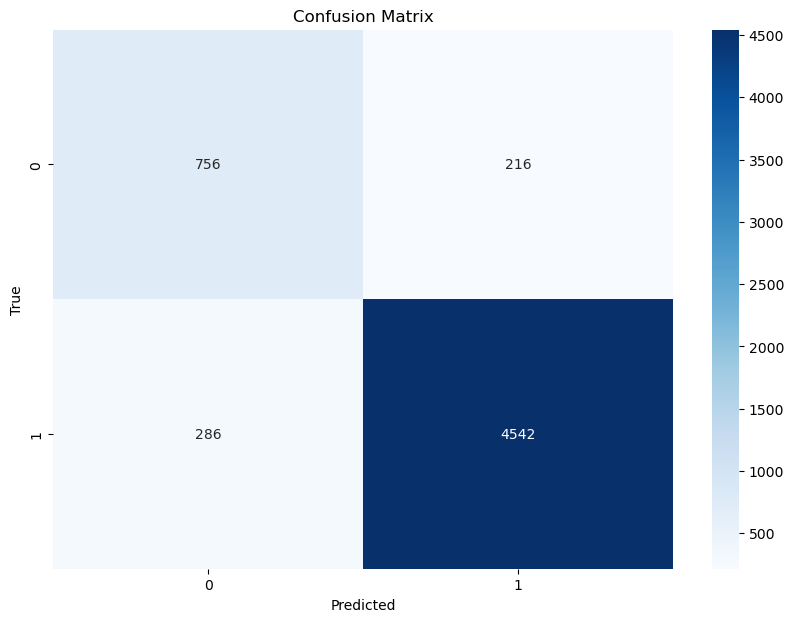

In [25]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Generate the confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Plot the confusion matrix
plt.figure(figsize=(10, 7))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()


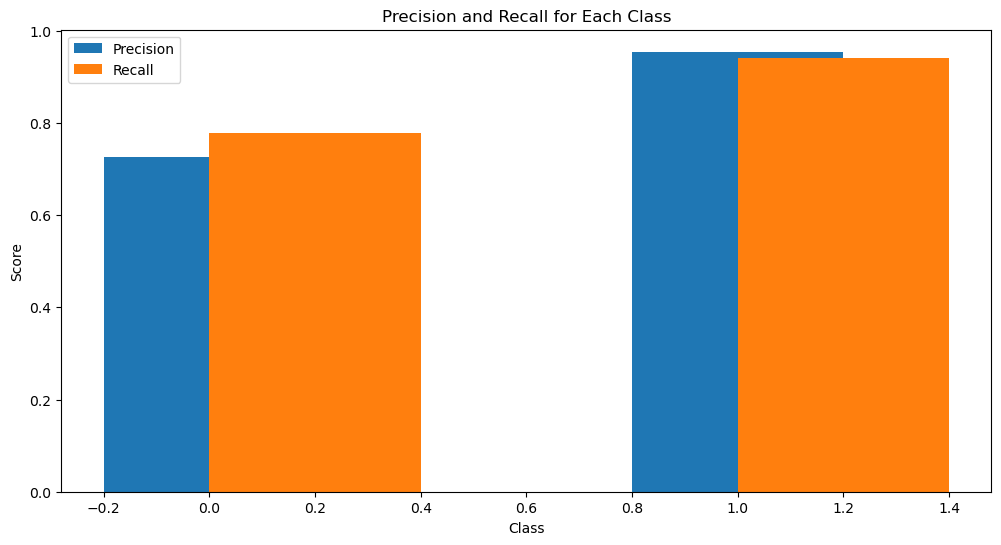

In [43]:
from sklearn.metrics import classification_report

# Generate classification report
report = classification_report(y_test, y_pred, output_dict=True)

# Extract precision and recall for each class
precision = [report[str(i)]['precision'] for i in range(len(report) - 3)]
recall = [report[str(i)]['recall'] for i in range(len(report) - 3)]

# Plot precision and recall
plt.figure(figsize=(12, 6))
plt.bar(range(len(precision)), precision, width=0.4, label='Precision', align='center')
plt.bar(range(len(recall)), recall, width=0.4, label='Recall', align='edge')
plt.title('Precision and Recall for Each Class')
plt.xlabel('Class')
plt.ylabel('Score')
plt.legend()
plt.show()


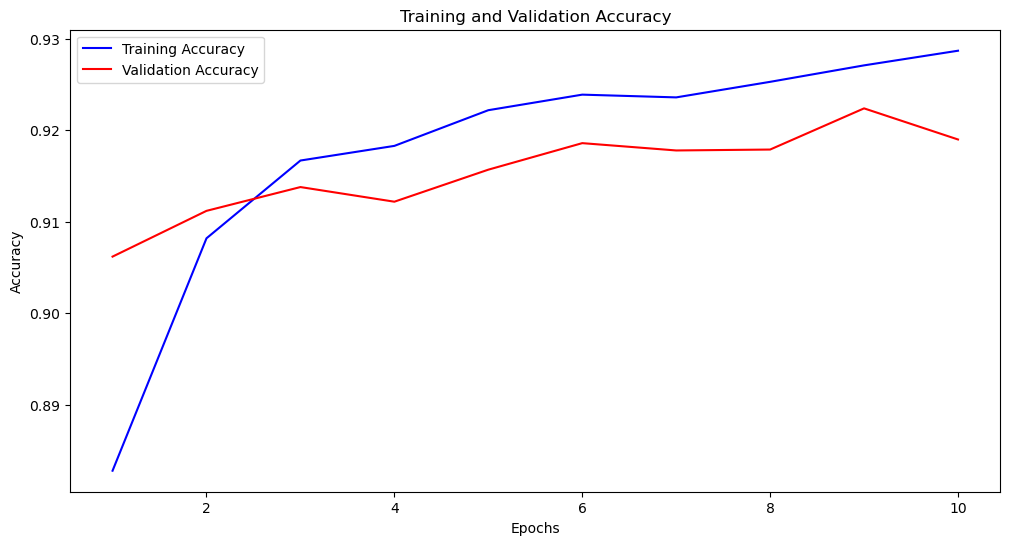

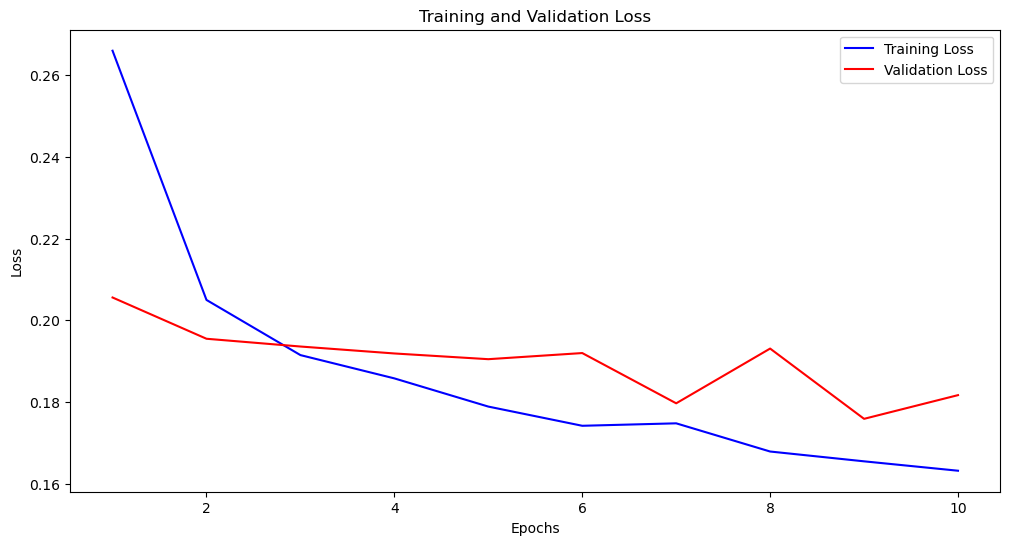

In [44]:
import matplotlib.pyplot as plt

# Simulated history data based on provided values
history = {
    'accuracy': [0.8828, 0.9082, 0.9167, 0.9183, 0.9222, 0.9239, 0.9236, 0.9253, 0.9271, 0.9287],
    'val_accuracy': [0.9062, 0.9112, 0.9138, 0.9122, 0.9157, 0.9186, 0.9178, 0.9179, 0.9224, 0.9190],
    'loss': [0.2660, 0.2050, 0.1915, 0.1858, 0.1789, 0.1742, 0.1748, 0.1679, 0.1655, 0.1632],
    'val_loss': [0.2056, 0.1955, 0.1936, 0.1919, 0.1905, 0.1920, 0.1797, 0.1931, 0.1759, 0.1817]
}

# Plotting Training and Validation Accuracy
epochs = range(1, len(history['accuracy']) + 1)

plt.figure(figsize=(12, 6))
plt.plot(epochs, history['accuracy'], 'b', label='Training Accuracy')
plt.plot(epochs, history['val_accuracy'], 'r', label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

# Plotting Training and Validation Loss
plt.figure(figsize=(12, 6))
plt.plot(epochs, history['loss'], 'b', label='Training Loss')
plt.plot(epochs, history['val_loss'], 'r', label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()
